<a href="https://colab.research.google.com/github/deborahmasibo/Moringa-Core-Module-2-Week-3-IP/blob/main/Hypothyroidism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Nairobi Hospital Hypothyroidism Prediction**

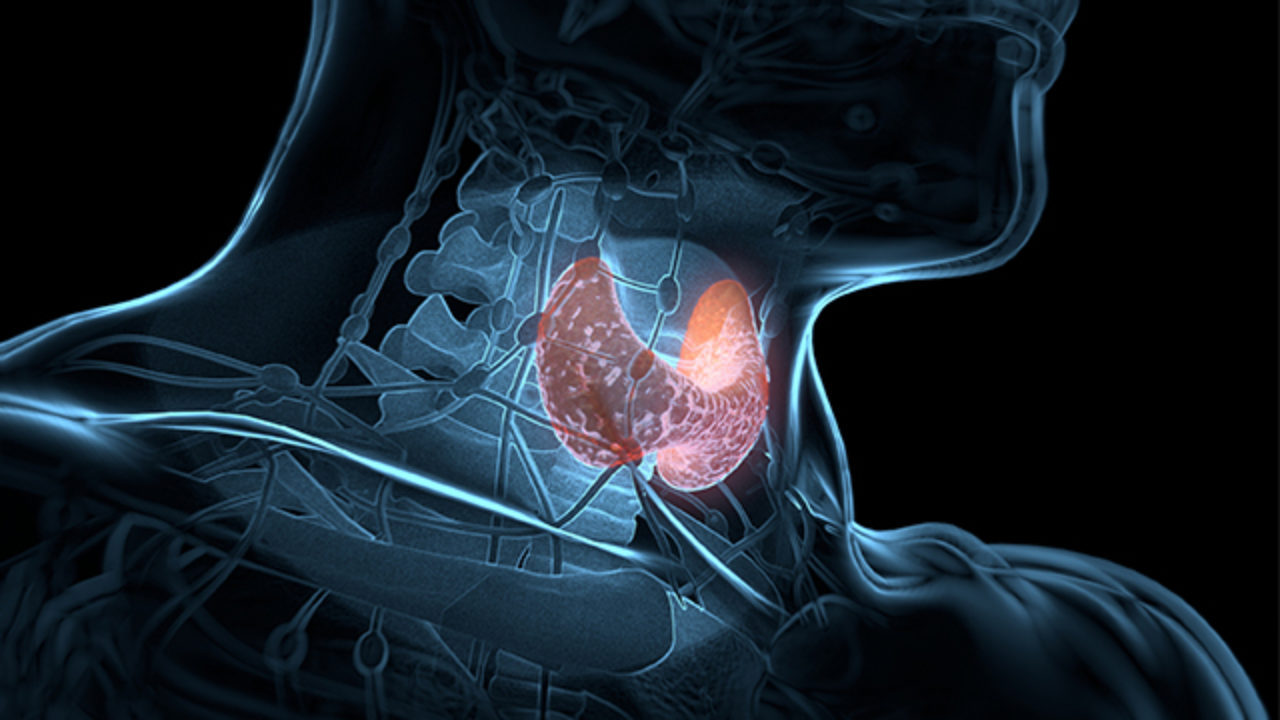

## 1. Defining the Question

### a) Specifying the Question

Hyperthyroidism (underactive thyroid) is a condition in which the thyroid gland does not produce enough of crucial hormones (for example, thyroxine) [link](https://www.mayoclinic.org/diseases-conditions/hypothyroidism/symptoms-causes/syc-20350284#:~:text=Hypothyroidism%20(underactive%20thyroid)%20is%20a,symptoms%20in%20the%20early%20stages).

The Nairobi Hospital conducted a clinical camp for hypothyroidism. The endocrinology department needed a prediction model to determine whether or not a patient's symptoms indicate that they had hypothyroid.



### b) Defining the Metric for Success

* Accurately predicting whether or not a patient had hypothyroidism based on their symptoms.
* The prediction accuracy needs to be at least 90%, as medical predictions require results to have the highest accuracy possible.

### c) Understanding the context 

The Nairobi Hospital Endocrynology department requires predictions that predict whether or not a patient has hypothyroidism, based on their symptoms. 

The prediction model will be used as an inkling to a patient's condition. The higher the accuracy, the easier it will be for the doctors to be able to make the required judgements on how to best treat, or prevent the onset of the condition. Therefore, the prediction accuracy needs to be as high as possible (at least 90%).

### d) Recording the Experimental Design

The following list depicts the steps to be undertaken during the project.

1. Data sourcing/loading.
2. Data Understanding
3. Data Relevance
4. External Dataset Validation
5. Data Preperation
6. Univariate Analysis
7. Bivariate Analysis
8. Multivariate Analysis
9. Modeling:

  a) Decision trees:
  * RandomForestClassifier
  * GradientBosstingClassifier

  b) Support Vector Machine - SupportVectorClassification

10. Implementing the solution
11. Challenging the solution
12. Conclusion
13. Follow up questions.


### e) Data Relevance

1. The data should have variables that adequately contribute to predicting the match results.
2. The dataset should lead to a high model fit (high accuracy, after all possible model optimization procedures have been applied.

## 2. Data Understanding

In [60]:
# Imports
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, f1_score, precision_score, recall_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from scipy.stats import bartlett
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
import os
# Using seaborn style defaults and setting the default figure size
sns.set(rc={'figure.figsize':(30, 5)})
from warnings import filterwarnings
filterwarnings('ignore')
%matplotlib inline

In [61]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Accessing working directory
os.chdir('/content/drive/My Drive/Core/Machine Learning/Moringa Core Module 2 Week 3 IP')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### a) Reading the Data

In [62]:
# Dataset loading
thyroid = pd.read_csv('hypothyroid.csv', na_values = {'?'})

### b) Checking the Data

**Number of Records**

In [63]:
# Number of rows and columns
print(f'Records: {thyroid.shape[0]} and columns: {thyroid.shape[1]}')

Records: 3163 and columns: 26


**Top Dataset Preview**

In [64]:
# View all columns
pd.set_option('display.max_columns', None)

In [65]:
# First 5 records
thyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n,NaN
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n,NaN
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n,NaN
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n,NaN
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n,NaN


**Bottom Dataset Preview**

In [66]:
# Last 5 records
thyroid.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58.0,F,f,f,f,f,f,f,f,f,f,f,f,y,5.8,y,1.7,y,86.0,y,0.91,y,95.0,n,NaN
3159,negative,29.0,F,f,f,f,f,f,f,f,f,f,f,f,y,0.8,y,1.8,y,99.0,y,1.01,y,98.0,n,NaN
3160,negative,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,1.2,y,0.6,y,71.0,y,0.68,y,104.0,n,NaN
3161,negative,74.0,F,f,f,f,f,f,f,f,f,f,f,f,y,1.3,y,0.1,y,65.0,y,0.48,y,137.0,n,NaN
3162,negative,56.0,F,t,f,f,f,f,f,f,f,f,f,f,y,0.0,y,1.8,y,139.0,y,0.97,y,143.0,n,NaN


### c) Checking Datatypes

In [67]:
# Dataset infromation
thyroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     3163 non-null   object 
 1   age                        2717 non-null   float64
 2   sex                        3090 non-null   object 
 3   on_thyroxine               3163 non-null   object 
 4   query_on_thyroxine         3163 non-null   object 
 5   on_antithyroid_medication  3163 non-null   object 
 6   thyroid_surgery            3163 non-null   object 
 7   query_hypothyroid          3163 non-null   object 
 8   query_hyperthyroid         3163 non-null   object 
 9   pregnant                   3163 non-null   object 
 10  sick                       3163 non-null   object 
 11  tumor                      3163 non-null   object 
 12  lithium                    3163 non-null   object 
 13  goitre                     3163 non-null   objec

* The dataset has missing values.
* The age, TSH, T3 TT4, T4U and FTI columns need to be converted to numeric form.

## 3. External Dataset Validation 

## 4. Data Preperation

### a) Validation

In [68]:
# Checking columns
thyroid.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

All columns will be retained.

### b) Completeness

In [69]:
# Checking for missing values
thyroid.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [70]:
# Check percentage of missing values for each column
# List of columns with missin values
missing_cols = []
for i, col in enumerate(thyroid.columns):
  missing = (thyroid[col].isnull().sum()/thyroid.shape[0])*100
  if missing > 0:
    missing_cols.append(col)
  print(f'{i+1}. {col} = {(thyroid[col].isnull().sum()/thyroid.shape[0])*100}%')

1. status = 0.0%
2. age = 14.1005374644325%
3. sex = 2.3079355042681002%
4. on_thyroxine = 0.0%
5. query_on_thyroxine = 0.0%
6. on_antithyroid_medication = 0.0%
7. thyroid_surgery = 0.0%
8. query_hypothyroid = 0.0%
9. query_hyperthyroid = 0.0%
10. pregnant = 0.0%
11. sick = 0.0%
12. tumor = 0.0%
13. lithium = 0.0%
14. goitre = 0.0%
15. TSH_measured = 0.0%
16. TSH = 14.796079671198228%
17. T3_measured = 0.0%
18. T3 = 21.97281062282643%
19. TT4_measured = 0.0%
20. TT4 = 7.872273158393931%
21. T4U_measured = 0.0%
22. T4U = 7.840657603540942%
23. FTI_measured = 0.0%
24. FTI = 7.809042048687955%
25. TBG_measured = 0.0%
26. TBG = 91.77995573822321%


* The TBG column will be dropped as 92% of its records are missing.
* The rest will be imputed.

In [71]:
# Columns with mising values
missing_cols

['age', 'sex', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

In [72]:
# Dropping TBG
thyroid.drop('TBG', axis = 1, inplace = True)

In [73]:
# Unique sex column values
thyroid.sex.value_counts()

F    2182
M     908
Name: sex, dtype: int64

In [74]:
# Imputing with the mode which is female
thyroid.fillna('F', inplace = True)

In [75]:
# Removing columns that have been dealt with from the list of columns with 
# missing values.
missing_cols.remove('sex')
missing_cols.remove('TBG')

**Changing the datatypes first**

In [76]:
# Converting the numeric columns from object type to numeric datatypes.
for col in missing_cols:
  thyroid[col] = pd.to_numeric(thyroid[col],errors='coerce')
# Imputing the mean
for col in missing_cols:
  thyroid[col].fillna(thyroid[col].mean(), inplace = True)

In [77]:
# Checking changes
thyroid.isnull().any().any()

False

All missing values have been dealt with.

### c) Consistency

In [78]:
# Checking for duplicates
thyroid.duplicated().any().any()

True

In [79]:
# Dropping duplicates
thyroid.drop_duplicates(inplace= True)

In [80]:
# Checking changes
thyroid.duplicated().any().any()

False

Duplicates have been removed successfully.

### d) Uniformity

In [81]:
# Columns
thyroid.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured'],
      dtype='object')

In [82]:
# Changing all column names to lower case
thyroid.columns = thyroid.columns.str.lower()
# Checking changes
thyroid.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti', 'tbg_measured'],
      dtype='object')

The column names have a consistent case.

### e) Outliers

In [83]:
# Outliers function
def outliers(data):
  # IQR
  Q1, Q3, IQR = 0, 0, 0
  outliers = pd.DataFrame()
  # Numerical columns
  numerical = data.select_dtypes(include = ['int64', 'float64'])
  Q1 = numerical.quantile(0.25)
  Q3 = numerical.quantile(0.75)
  IQR = Q3 - Q1
  # Outliers
  outliers = numerical[((numerical < (Q1 - 1.5 * IQR)) |(numerical > (Q3 + 1.5 * IQR))).any(axis=1)]
  print(f'Number of outliers = {outliers.shape[0]}')
  print(f'Percentage = {(outliers.shape[0]/data.shape[0])*100}%')

In [84]:
# Checking for outliers
# List of columns with continuous values
continuous = list(thyroid.select_dtypes(exclude = 'object'))
outliers(thyroid[continuous])

Number of outliers = 655
Percentage = 21.78250748254074%


The outliers form a significant part of the data. Standardization will be used to normalize the distribution of the data.

## 5. Desciptive analysis

### a) Univariate Analysis

#### Categorical

In [234]:
# Categorical Plots
def CatPlots(column, rot, data):
  fig,ax  = plt.subplots(figsize = (20,5))
  sns.countplot(data[column], palette = 'mako', orient = 'v')
  plt.title('Bar Plot -  '+ column, fontsize=20, y = 1.05)
  plt.xticks(rotation = rot)
  plt.xlabel(column, fontsize=15)
  plt.ylabel('Count', fontsize=15)
  plt.show()

In [87]:
# Categorical columns
categorical = thyroid.select_dtypes(include = 'object').columns.tolist()
categorical

['status',
 'sex',
 'on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_medication',
 'thyroid_surgery',
 'query_hypothyroid',
 'query_hyperthyroid',
 'pregnant',
 'sick',
 'tumor',
 'lithium',
 'goitre',
 'tsh_measured',
 't3_measured',
 'tt4_measured',
 't4u_measured',
 'fti_measured',
 'tbg_measured']

**Status**

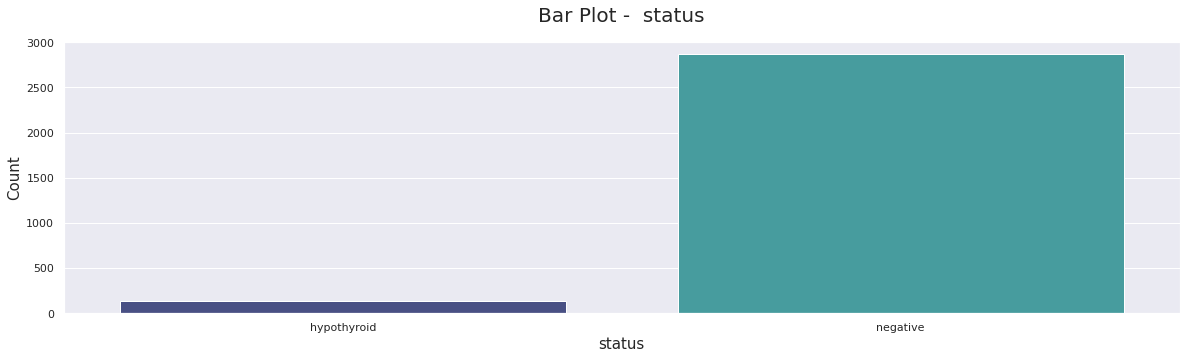

In [235]:
# Whether a person had hypothyroid or not
CatPlots(categorical[0], 0, thyroid)

Most patients in the camp did not have hypothyroid.

**Sex**

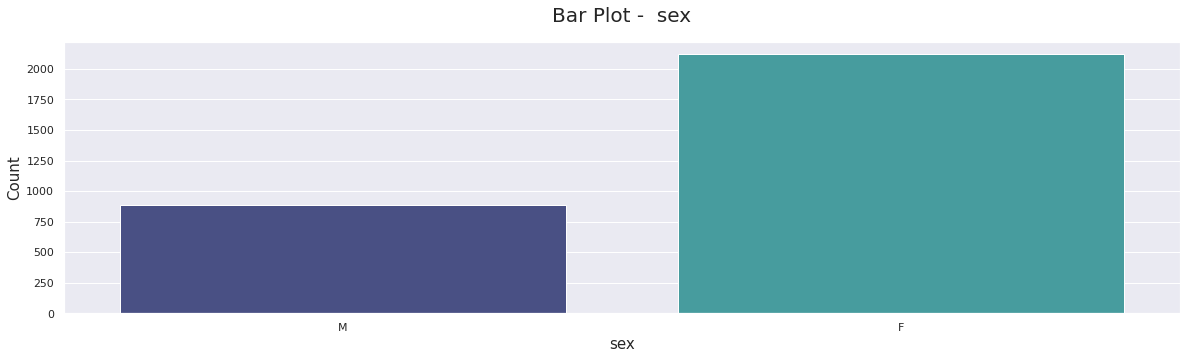

In [236]:
# Patient sex
CatPlots(categorical[1], 0, thyroid)

Most patients were female.

**Pregnancy**

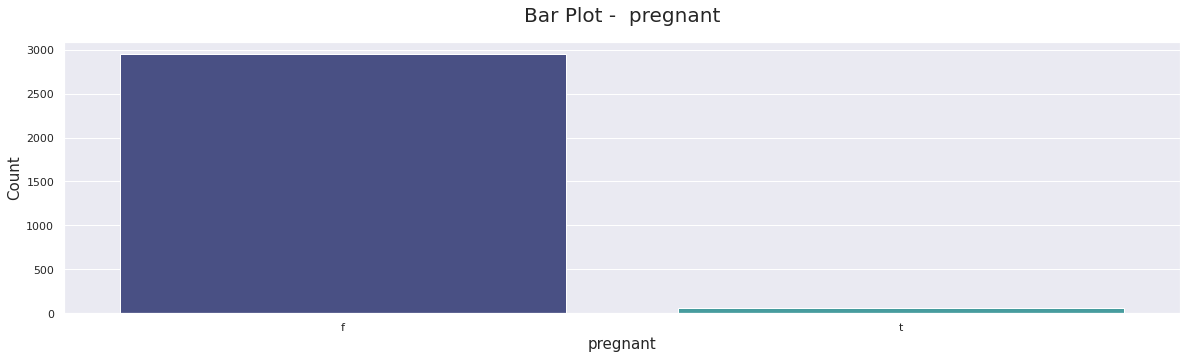

In [237]:
# Pregnancy
CatPlots(categorical[8], 0, thyroid)

Most female patients were not pregnant.

**Medication**

In [112]:
# Whether or not patients were on medication.
for col in categorical[2:5]:
  print(thyroid[col].value_counts(),'\n')

f    2561
t     446
Name: on_thyroxine, dtype: int64 

f    2952
t      55
Name: query_on_thyroxine, dtype: int64 

f    2965
t      42
Name: on_antithyroid_medication, dtype: int64 





> **Hypothyroid Medication**


* Thyroxine (T4), is a type of thyroid hormone secreted by the thyroid gland into the bloodstream. It plays a vital role in digestion, heart and muscle function, brain development and maintenance of bones [link](https://www.yourhormones.info/hormones/thyroxine/).
*  Lexothyroxine is a synthetic version of thyroxine, used to prevent symptoms of hypothryodism [link](https://www.nhs.uk/medicines/levothyroxine/#:~:text=Key%20facts,your%20symptoms%20start%20to%20improve).
* Most patients were not on hypothyroid medication.





> **Hyperthyroidism**

* Hyperthyroidism (overactive) occurs when the thyroid gland produces too much of the hormone thyroxine. The condition can accelerate the body's metabolism, causing unintentional weight loss and a rapid or irregular heartbeat [link](https://www.mayoclinic.org/diseases-conditions/hyperthyroidism/symptoms-causes/syc-20373659#:~:text=Hyperthyroidism%20(overactive%20thyroid)%20occurs%20when,treatments%20are%20available%20for%20hyperthyroidism). 
* Antithyroid drugs (also called thionamides) are most often used to treat hyperthyroidism. These drugs block the formation of thyroid hormone by the thyroid gland [link](https://en.wikipedia.org/wiki/Antithyroid_agent).
* Most patients were not on anithyroid medication.

**Thyroid Surgery**

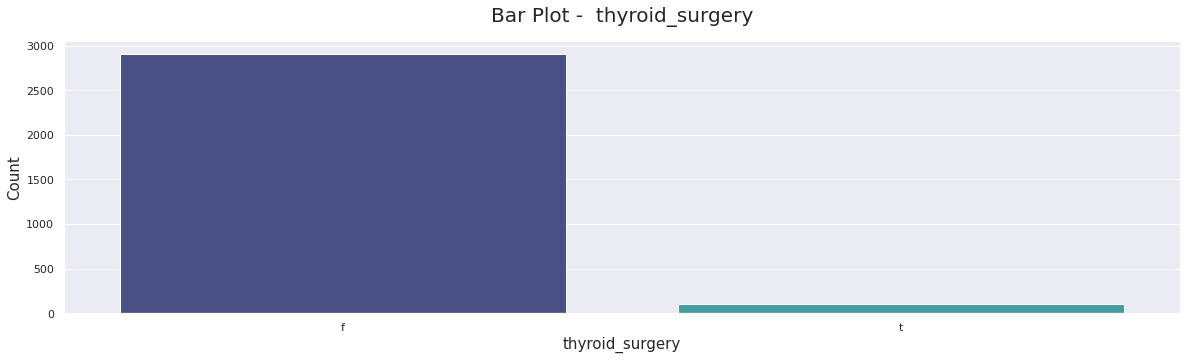

In [238]:
# Pregnancy
CatPlots(categorical[5], 0, thyroid)

Most patients had not had thyroid surgery.

**Queries**

In [115]:
# Queries on hypothyroid and hyperthyroid.
for col in categorical[6:8]:
  print(thyroid[col].value_counts(),'\n')

f    2772
t     235
Name: query_hypothyroid, dtype: int64 

f    2780
t     227
Name: query_hyperthyroid, dtype: int64 



Most patients did not claim to have hypothyroid or hyperthyroid.

**Health Status**

In [117]:
# Health Conditions
for col in categorical[9:13]:
  print(thyroid[col].value_counts(),'\n')

f    2910
t      97
Name: sick, dtype: int64 

f    2967
t      40
Name: tumor, dtype: int64 

f    3005
t       2
Name: lithium, dtype: int64 

f    2912
t      95
Name: goitre, dtype: int64 



* Most patient were of general health, and did not have tumors or goitre ( a condition that develops as a result of iodine deficiency or inflammation of the thyroid gland) [link](https://www.mayoclinic.org/diseases-conditions/goiter/symptoms-causes/syc-20351829?utm_source=Google&utm_medium=abstract&utm_content=Goiter&utm_campaign=Knowledge-panel).

* A high conentration of lithium inhibits alters thyroglobulin structure, and inhibits thyroid hormone secretion. The latter effect is critical to the development of hypothyroidism and goiter [link](https://pubmed.ncbi.nlm.nih.gov/9827658/). Most patients did not have high lithium levels in their blood.


**Tests**

In [118]:
# Thryroid condition tests
for col in categorical[13:]:
  print(thyroid[col].value_counts(),'\n')

y    2631
n     376
Name: tsh_measured, dtype: int64 

y    2406
n     601
Name: t3_measured, dtype: int64 

y    2846
n     161
Name: tt4_measured, dtype: int64 

y    2847
n     160
Name: t4u_measured, dtype: int64 

y    2848
n     159
Name: fti_measured, dtype: int64 

n    2835
y     172
Name: tbg_measured, dtype: int64 





> **Thyroid-Stimulating Hormone (TSH)**

* Thyroid-stimulating hormone is a pituitary hormone that stimulates the thyroid gland to produce thyroxine (T4), and then triiodothyronine (T3)which stimulates the metabolism of almost every tissue in the body.
* High TSH levels could be an indication of hypothyroidism. Meanwhile, low TSH levels could be a sign of hypertherthyroidism [link](https://en.wikipedia.org/wiki/Thyroid-stimulating_hormone).



> **Triiodothyronine (T3)**

* Triiodothyronine is a thyroid hormone. It affects almost every physiological process in the body, including growth and development, metabolism, body temperature, and heart rate [link](https://en.wikipedia.org/wiki/Triiodothyronine).
* Low levels of the hormone could be a sign of hypothyroidism, and high levels could be a sign of hyperthyroidism.



> **Thyroxine(T4)**

* Thyroxine (T4), is a type of thyroid hormone secreted by the thyroid gland into the bloodstream. It plays a vital role in digestion, heart and muscle function, brain development and maintenance of bones [link](https://www.yourhormones.info/hormones/thyroxine/).
* TT4 is the test used to measure thyroxine levels in the body.
* Low levels of the hormone could be a sign of hypothyroidism, and high levels could be a sign of hyperthyroidism.



> **Free T4 Index(FTI)**

* The free T4 index (FTI) is a blood test used to measure T4 levels in the blood to help determine whether the thyroid gland is underactive (hypothyroidism) or overactive (hyperthyroidism) [link](https://www.verywellhealth.com/free-t4-index-procedure-4628291#:~:text=The%20free%20T4%20index%20(FTI,)%20or%20overactive%20(hyperthyroidism).



> **Thyroxine-binding globulin (TBG)**

* Thyroxine-binding globulin is a globulin protein that is produced in the lover. TBG binds thyroid hormones in circulation. It is a transport protein responsible for carrying the thyroid hormones thyroxine and triiodothyronine in the bloodstream.
* The TBG blood test measures the TBG levels.


> Most patients had these hormones measured to determine hypothyroidism.



#### Numerical

In [136]:
# Distribution and Boxplot plot functions
def NumericalPlots(column, data):
  fig, ax = plt.subplots(1,2, figsize = (12, 5))
  # Outliers
  # Distribution plot
  sns.distplot(data[column], hist=True, ax=ax[0], color = 'teal')
  ax[0].set_title('Outliers: Freq dist '+ column, fontsize=10)
  ax[0].set_xlabel(column, fontsize=8)
  ax[0].set_ylabel('Count', fontsize=8)
  # Box plot
  sns.boxplot(y = data[column], ax = ax[1], color = 'teal')
  ax[1].set_title(f'Outliers: Box Plot - {column}')
  ax[1].set_xlabel(column)


In [122]:
# Continuos columns
continuous = thyroid.select_dtypes(exclude = 'object').columns.tolist()
continuous

['age', 'tsh', 't3', 'tt4', 't4u', 'fti']

**Age**

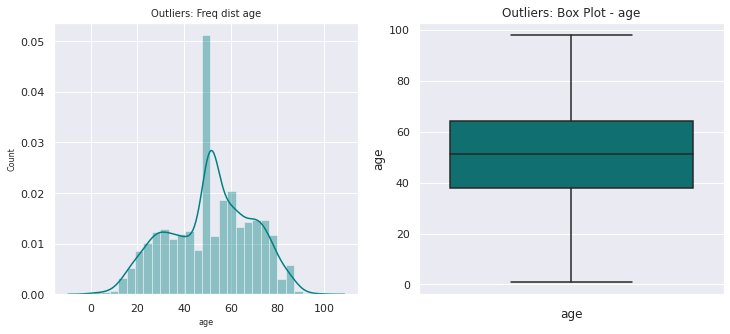

In [139]:
# Age distribution
NumericalPlots(continuous[0], thyroid)

* There are no outliers in the age column.
* The modal age of the patients is 50.

**Thyroid-Stimulation Hormone**

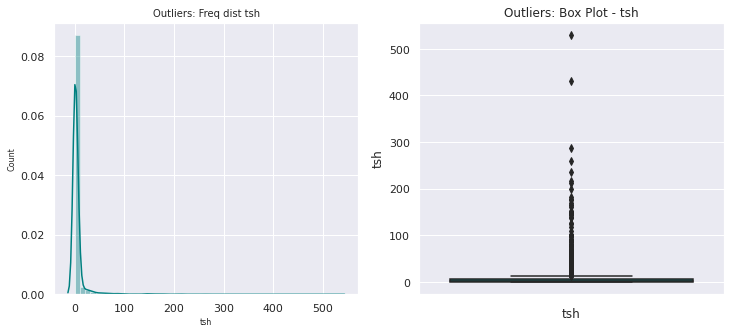

In [153]:
# TSH level distribution
NumericalPlots(continuous[1], thyroid)

The TSH column has outliers.

According to the American Thyrid Association, TSH levels typically fall between 0.4 and 4.0 milliunits per liter (mU/L) [link](https://www.webmd.com/women/what-is-tsh-test#:~:text=TSH%20levels%20typically%20fall%20between,you%20have%20an%20underactive%20thyroid.).

In [149]:
# Lowest TSH values
thyroid[thyroid['tsh'] < 0.4]['tsh'].count()

1080

1,080 patients have TSH levels lower than 0.4. This is an indication of hyperthyroidism. 

In [151]:
# Normal TSH values
thyroid[(thyroid['tsh'] >= 0.4) & (thyroid['tsh'] <= 4)]['tsh'].count()

1108

1,108 have normal TSH levels.

In [150]:
# Highest TSH values
thyroid[thyroid['tsh'] > 4]['tsh'].count()

819

819 patients have TSH  levels greater than 4, a symptom of hypothyroidism.

**Triiodothyronine**

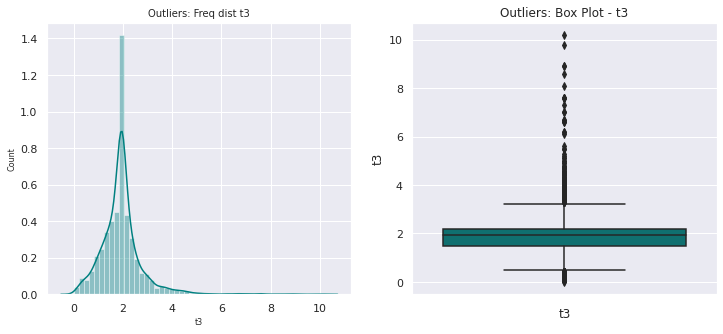

In [154]:
# T3 levels distribution
NumericalPlots(continuous[2], thyroid)

* The T3 column has outliers.
* The most common level is close to 2 pmol/L.

Normal T3 levels in adults range from 2.0 to 7.0 picomoles per liter (pmol/L) [link](https://www.mountsinai.org/health-library/tests/t3-test#:~:text=The%20range%20for%20normal%20values,per%20liter%20(pmol%2FL)).

Low T3 levels are a sign of hypothyroidism, and high levels are a sign of hyperthyroidism.

In [155]:
# Low T3 levels
thyroid[thyroid['t3'] < 2]['t3'].count()

1952

1,952 patients have low T3 levels.

In [156]:
# Normal T3 levels
thyroid[(thyroid['t3'] >= 2) & (thyroid['t3'] <= 7)]['t3'].count()

1044

1,044 patients have normal T3 levels.

In [157]:
# High T3 levels
thyroid[thyroid['t3'] > 7]['t3'].count()

11

Only 11 patients have high T3 levels.

**Thyroxine**

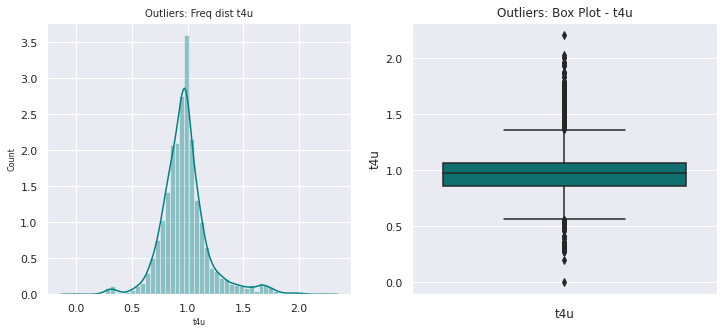

In [167]:
# T4 test levels distribution
NumericalPlots(continuous[4], thyroid)

* The column has outliers.
* The modal level is 1 ng/dL.

Normal T4 levels range from 0.9 to 2.3 nanograms per deciliter (ng/dL) [link](https://www.ucsfhealth.org/medical-tests/free-t4-test).

Low levels of T4 are a sign of hypothyroidism, while high levels are a sign of hyperthyeoidism.

In [168]:
# Low T4 levels
thyroid[thyroid['t4u'] < 0.9]['t4u'].count()

957

957 patients have lot T4 levels.

In [169]:
# Normal T4 levels
thyroid[(thyroid['t4u'] >= 0.9) & (thyroid['t4u'] <= 2.3)]['t4u'].count()

2050

Most patients (2,050) have normal T4 levels.

In [170]:
# High T4 levels
thyroid[thyroid['t4u'] > 2.3]['t4u'].count()

0

No patient has a T4 level > 2.3.

**Free Thyroxine Index**

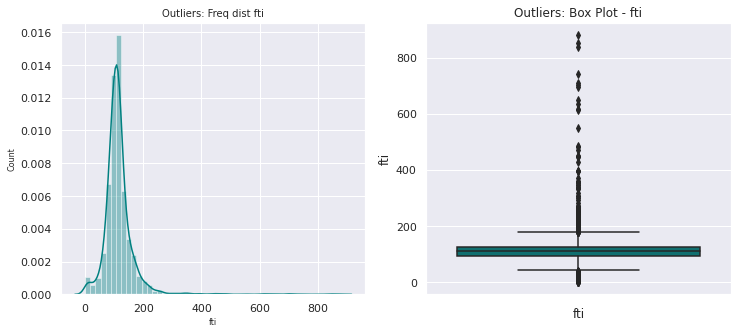

In [172]:
# FTI levels distribution
NumericalPlots(continuous[5], thyroid)

The column has outliers.

Normal FTI is between 53–142 [link](https://www.sciencedirect.com/book/9780407002760/laboratory-investigation-of-endocrine-disorders).

Low FTI levels are a sign of hypothyroidism, while high levels are a sign of hyperthyroidism.

In [181]:
# Low FTI levels
thyroid[thyroid['fti'] < 53]['fti'].count()

138

138 patients have low indices.

In [182]:
# Normal FTI levels
thyroid[((thyroid['fti'] >= 53) & (thyroid['fti'] <= 142))]['fti'].count()

2394

Most patients have normal FT indices.

In [183]:
# HighFTI levels
thyroid[thyroid['fti'] > 142]['fti'].count()

475

475 patients have high indices.

### b) Bivariate Analysis

#### Categorical - Categorical

In [185]:
# Categorical columns
categorical

['status',
 'sex',
 'on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_medication',
 'thyroid_surgery',
 'query_hypothyroid',
 'query_hyperthyroid',
 'pregnant',
 'sick',
 'tumor',
 'lithium',
 'goitre',
 'tsh_measured',
 't3_measured',
 'tt4_measured',
 't4u_measured',
 'fti_measured',
 'tbg_measured']

In [230]:
# Function used to generate a crosstab before plotting a stacked bar chart.
def CrosstabPlot(x, y, rot, data):  
  table = pd.crosstab(data[x], data[y])
  table.plot.bar(stacked = True, figsize = (30,5), color = ['#2f455c', '#21D0B2'])
  plt.title(f'{x} Vs {y}', y = 1.05, fontsize = 12)
  plt.xticks(rotation = rot)
  plt.xlabel(x, fontsize = 10)
  plt.ylabel(y, fontsize = 10)

**Status Vs Sex**

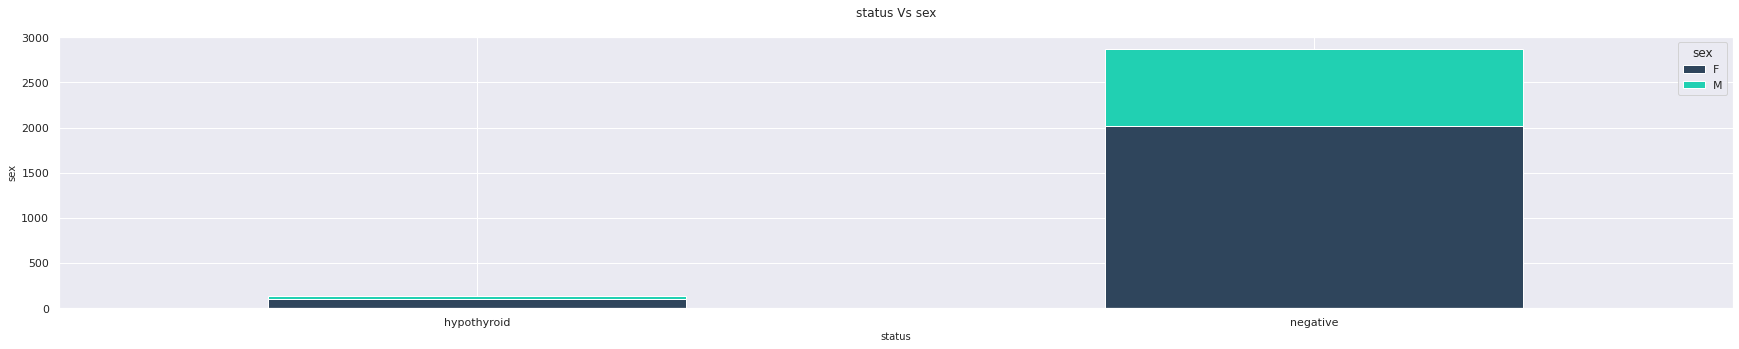

In [244]:
# Status and sex
CrosstabPlot('status', 'sex', 0, thyroid)

Females had the highest cases of hypothyroid. This observation could be caused by their larger numbers (participation) in the camp.

**Status Vs Pregnancy**

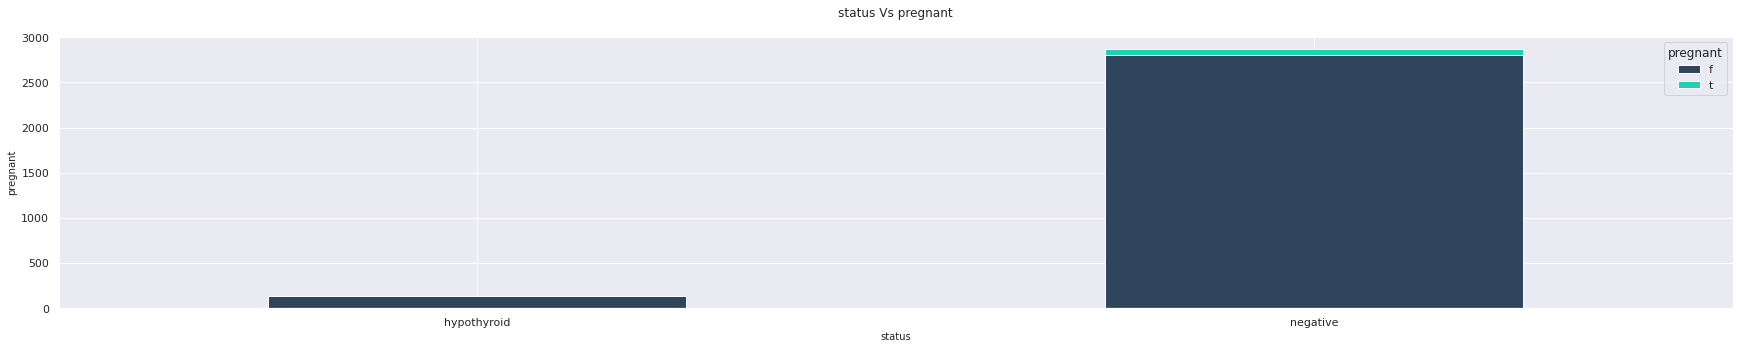

In [243]:
# Status and pregnancy
CrosstabPlot('status', 'pregnant', 0, thyroid)

None of the patients with hypothyroid were pregnant. The condition mostly affects middle-aged and older women [link](https://www.mayoclinic.org/diseases-conditions/hypothyroidism/symptoms-causes/syc-20350284#:~:text=Although%20hypothyroidism%20most%20often%20affects,have%20few%20signs%20and%20symptoms.).

**Status Vs Thyroid Surgery**

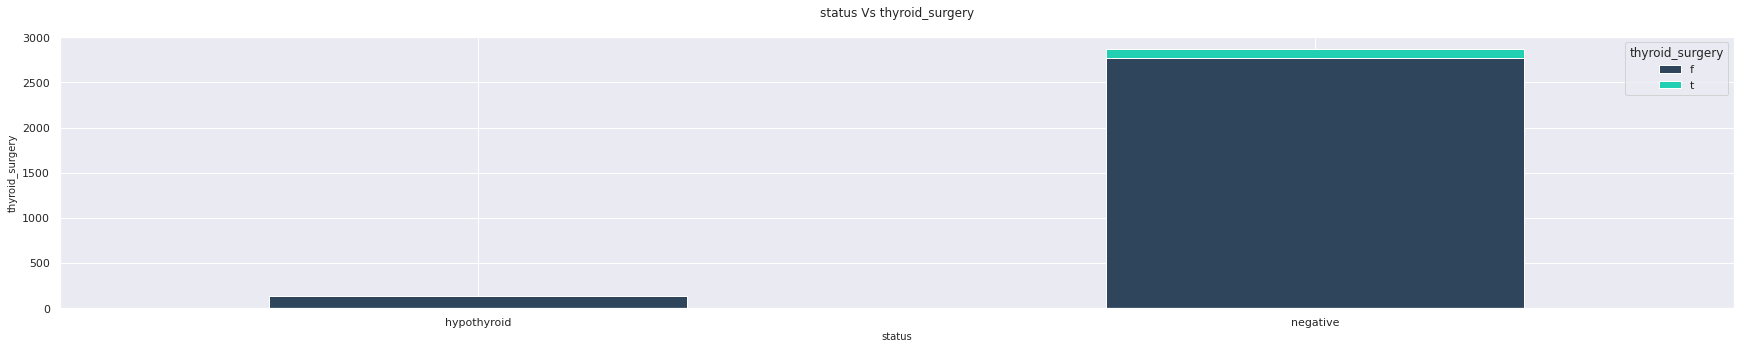

In [242]:
# Stasus and pregnancy
CrosstabPlot('status', 'thyroid_surgery', 0, thyroid)

Patients with hypothyroid did not have a thyroidectomy (the surgical removal of all or part of the thyroid gland) [link](https://www.mayoclinic.org/tests-procedures/thyroidectomy/about/pac-20385195#:~:text=Thyroidectomy%20is%20the%20surgical%20removal,how%20quickly%20you%20burn%20calories).

**Status Vs Medication**

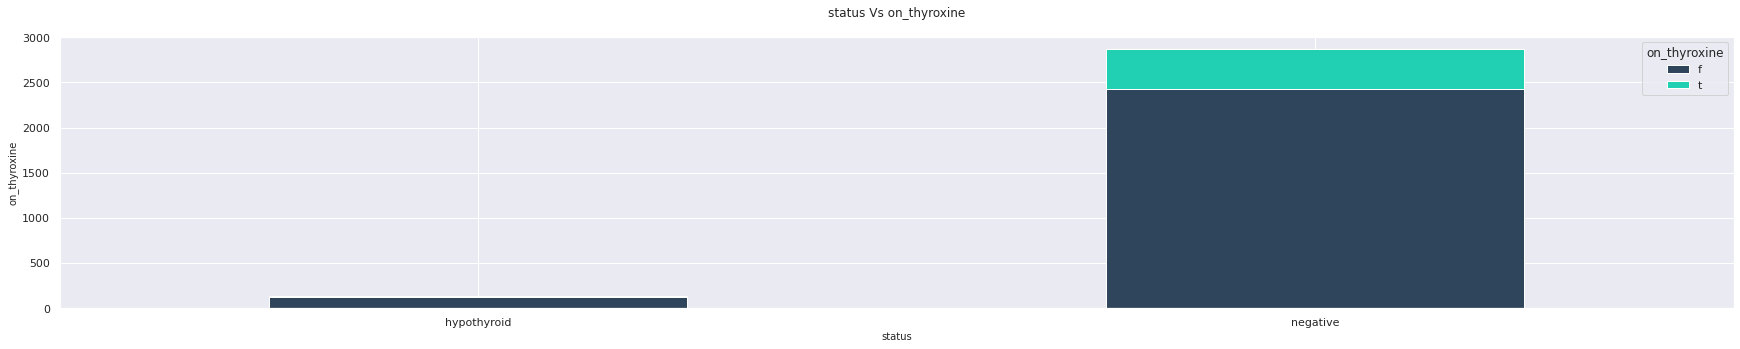

In [246]:
# Status and Levothiroxine
CrosstabPlot('status', 'on_thyroxine', 0, thyroid)

* None of the hypothyroid patients are on Levothyroxine.
* However, some patients with a negative status are on Levothyroxine.

**Status Vs Tumor**

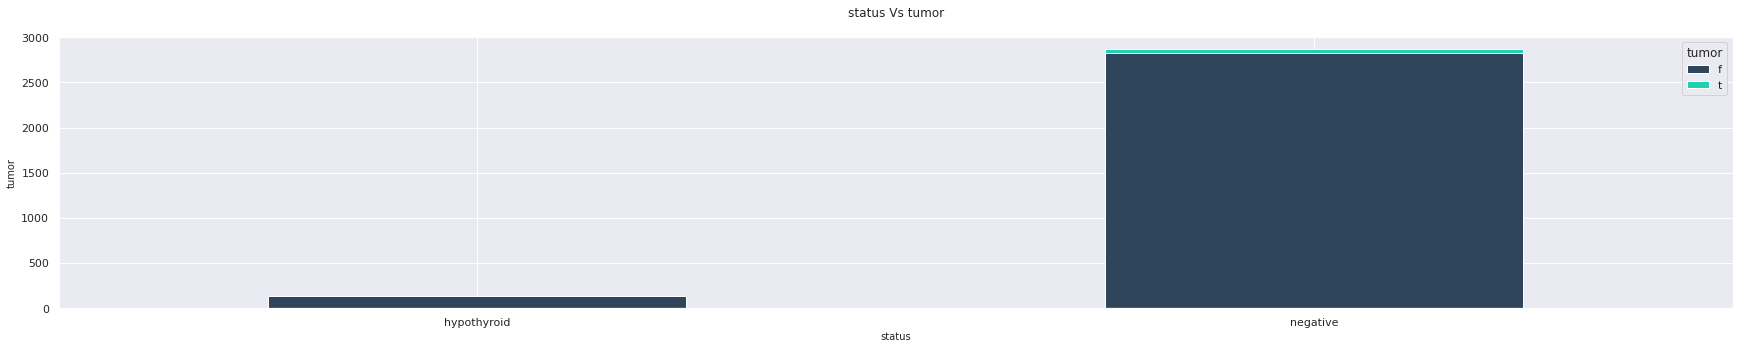

In [247]:
# Stasus and tumor
CrosstabPlot('status', 'tumor', 0, thyroid)

Only some patients who have a negative status have tumors.

#### Numerical - Numerical

In [30]:
# Pearson Correlation
def Corr(x,y,data):
  corr = data[[x,y]].corr()
  print(f'Correlation Matrix : \n{corr}')

In [31]:
# Pairplot Function
def PairPlot(data):
  cols = data.columns.values
  plot = sns.pairplot(data)
  plot.fig.set_size_inches(10,5)
  plot.fig.suptitle(f'Pairplot: {cols[0]} - {cols[1]}', y = 1.05)
  # plt.title()
  plt.show()
  print('\nCorrelation\n')
  Corr(cols[0], cols[1], data)

In [186]:
# Continuous columns
continuous

['age', 'tsh', 't3', 'tt4', 't4u', 'fti']

#### Numerical - Categorical

In [239]:
# Bar plot function
def BarPlotBiv(x,y, rot, data):
  fig, ax = plt.subplots(figsize = (20,5))
  sns.barplot(data[x], data[y], palette = 'mako')
  plt.title(f'{x} Distribution by {y}'
  , fontsize = 12, y = 1.05)
  plt.xticks(rotation = rot)
  plt.show()

### c) Multivariate Analysis

Correlation Heatmap

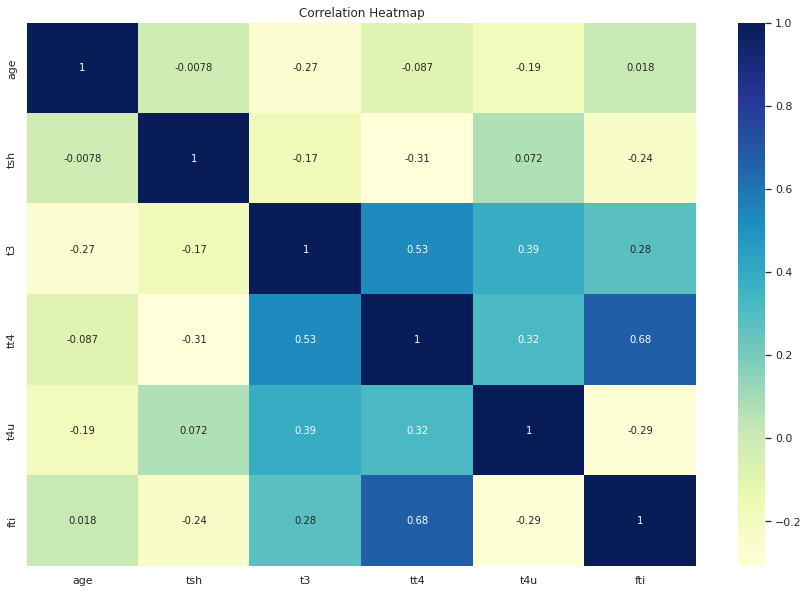

In [180]:
# Checking for high correlation between columns
fig, ax = plt.subplots(figsize = (15, 10))
sns.heatmap(thyroid.corr(), annot = True, cmap = plt.cm.YlGnBu)
plt.title('Correlation Heatmap', y = 1.05);

* Only t3 -tt4 and tt4-fti have moderate correlation. They will be retained for the multicollinearity check. 
* They will also be retained as removal might lead to information loss. Feature importance will be done to determine their importance before removal.

**VIF**

In [34]:
# VIF function
def VIF(data):
  # Correlation matrix
  correlation = data.corr()
  # Inverse matrix
  inv_corr = pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns=correlation.columns)
  return inv_corr

In [35]:
VIF(thyroid)

,age,tsh,t3,tt4,t4u,fti
age,1.097133,0.019616,0.304391,-0.109919,0.129475,0.011686
tsh,0.019616,1.178581,0.108328,0.674416,-0.437904,-0.333707
t3,0.304391,0.108328,1.618303,-0.444210,-0.517200,-0.286716
tt4,-0.109919,0.674416,-0.444210,4.622389,-2.426450,-3.556390
t4u,0.129475,-0.437904,-0.517200,-2.426450,2.769128,2.497090
fti,0.011686,-0.333707,-0.286716,-3.556390,2.497090,4.144575


The VIFs are lower than 5, therefore, multicollinearity is within a manageable range.

**Linear Discriminant Analysis**

In [36]:
# Scaling function
def Standardization(X_train, X_test):
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  return X_train, X_test

In [37]:
# LDA function
def Lda(X_train, X_test, y_train, components = None):
  lda = LDA(n_components= components)
  X_train = lda.fit_transform(X_train, y_train)
  X_test = lda.transform(X_test)
  return X_train, X_test

*Encoding*

In [38]:
# List of categorical columns
categorical = list(thyroid.select_dtypes(include = 'object'))
# Remove label column 
categorical.remove('status')

In [39]:
# Label encode label column
thyroid[['status']] = thyroid[['status']].apply(LabelEncoder().fit_transform)
# Checking changes
thyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured
0,0,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n
1,0,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n
2,0,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n
3,0,24.0,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n
4,0,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n


In [40]:
# One-hot encoding columns
thyroid = pd.get_dummies(thyroid)
# Checking changes
thyroid.head()

,status,age,tsh,t3,tt4,t4u,fti,sex_F,sex_M,on_thyroxine_f,on_thyroxine_t,query_on_thyroxine_f,query_on_thyroxine_t,on_antithyroid_medication_f,on_antithyroid_medication_t,thyroid_surgery_f,thyroid_surgery_t,query_hypothyroid_f,query_hypothyroid_t,query_hyperthyroid_f,query_hyperthyroid_t,pregnant_f,pregnant_t,sick_f,sick_t,tumor_f,tumor_t,lithium_f,lithium_t,goitre_f,goitre_t,tsh_measured_n,tsh_measured_y,t3_measured_n,t3_measured_y,tt4_measured_n,tt4_measured_y,t4u_measured_n,t4u_measured_y,fti_measured_n,fti_measured_y,tbg_measured_n,tbg_measured_y
0,0,72.0,30.0,0.6,15.0,1.48,10.0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
1,0,15.0,145.0,1.7,19.0,1.13,17.0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
2,0,24.0,0.0,0.2,4.0,1.00,0.0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
3,0,24.0,430.0,0.4,6.0,1.04,6.0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
4,0,77.0,7.3,1.2,57.0,1.28,44.0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0


In [41]:
# Features and label
Xch = thyroid.drop('status', axis = 1).values
ych = thyroid.status.values.reshape(-1, 1)
# Train-test-split
Xch_train, Xch_test, ych_train, ych_test = train_test_split(Xch, ych, test_size = 0.2, random_state = 0)

In [42]:
# Standardization
Xch_train, Xch_test = Standardization(Xch_train, Xch_test)

The sets above will be used to challenge the solution in the modelling section when LDA will be performed.

## 6. Modelling

In [43]:
# Features and label
X = thyroid.drop('status', axis = 1)
y = thyroid.status
# Train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Part 1. Decision Trees

#### a) RandomForestClassifier

**Function Definition**

In [44]:
#  Classification Model
def RF_Classifier(X_train, X_test, y_train, y_test, l = 1, mf = 'auto', n = 100,
                  depth= None, split = 2):
  # Changing test-train sets to numpy arrays
  X_train = X_train.values
  X_test = X_test.values
  y_train = y_train.values.reshape(-1, 1)
  y_test = y_test.values.reshape(-1, 1)
  # Standardization
  X_train, X_test = Standardization(X_train, X_test)
  # Classifier
  tree = RandomForestClassifier(n_estimators = n, random_state=0,
                                min_samples_split = split, max_depth= depth,
                                min_samples_leaf = l , max_features = mf)
  # Train it on our training set.
  tree.fit(X_train, y_train)
  # Prediction
  y_pred = tree.predict(X_test)
  # Metrics
  # Classification report
  report = classification_report(y_test, y_pred)
  print(f'Classification Report')
  print(f'{"-"*70}\n')
  print(f'{report}')
  # df
  comparison_frame = pd.DataFrame({'Actual': y_test.flatten(),
                                   'Predicted': y_pred.flatten()})
  print('\nPredictions')
  print(f'{"-"*70}\n')
  print(comparison_frame.head(), '\n')

In [45]:
def Importances_Class(X_train, X_test, y_train, y_test, f, n = 100,
                      depth= None, split = 2):
  # Classifier
  tree = RandomForestClassifier(n_estimators = n, random_state=0,
                                min_samples_split = split, max_depth= depth)
  # Train it on our training set.
  tree.fit(X_train, y_train)
  # Prediction
  y_pred = tree.predict(X_test)  
  # Importances
  importances = list(tree.feature_importances_)
  # Features
  feat = []
  imp = []
  # Dataframe
  df = pd.DataFrame()
  for feature, importance in zip(f, importances):
    feat.append(feature)
    imp.append(importance)
  df['features'] = feat
  df['importance'] = imp
  df.sort_values('importance', ascending = False, inplace = True)

  # Bar chart
  values = list(range(len(imp)))
  fig, ax = plt.subplots(figsize = (15, 5))
  plt.bar(feat, imp)
  # Tick labels for x axis
  plt.xticks(values, f, rotation='vertical')
  # Axis labels and title
  plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [46]:
# Visualization
def Visualize_Class(X_train, X_test, y_train, y_test, f, png_name, depth = None, split = 2, n = 100):
  # Scaling
  X_train, X_test = Standardization(X_train, X_test)
  # Classifier
  forest = RandomForestClassifier(n_estimators = n, random_state=0, min_samples_split = split, max_depth= depth)
  # Train it on our training set.
  forest.fit(X_train, y_train)
  # Prediction
  y_pred = forest.predict(X_test)
  tree = forest.estimators_[50]
  # In memory file-like object
  dot_data = StringIO()
  # Export a decision tree in DOT format
  # This function generates a GraphViz representation of the decision tree,
  # which is then written into out_file.
  export_graphviz(tree, out_file = dot_data, filled = True, special_characters = True,
                  feature_names = f, rounded = True)
  #  This function returns the entire content of the file.
  graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
  # Convert decision tree to image 
  graph.write_png(png_name)
  return Image(graph.create_png())

**Feature Importance**

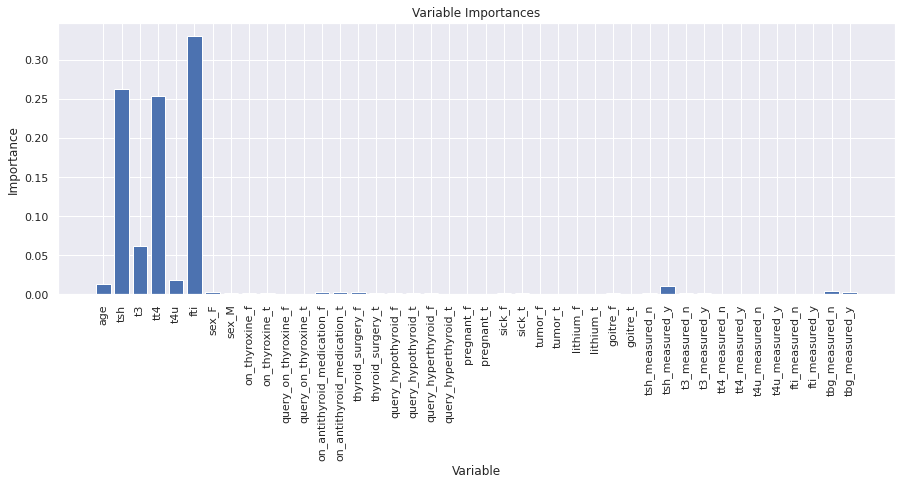

In [47]:
# Important Features
f = X.columns.tolist()
Importances_Class(X_train, X_test, y_train, y_test, f, n = 100,
                      depth= 5, split = 2)

Features with the higest importance are the tsh and fti

**Model Fitting and Predictions**

In [48]:
# With all features
estimators = 100
depth = 5
split = 2
RF_Classifier(X_train, X_test, y_train, y_test, estimators,
                  depth, split)

Classification Report
----------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.96      1.00      0.98       577

    accuracy                           0.96       602
   macro avg       0.48      0.50      0.49       602
weighted avg       0.92      0.96      0.94       602


Predictions
----------------------------------------------------------------------

   Actual  Predicted
0       1          1
1       1          1
2       1          1
3       1          1
4       1          1 



In [49]:
# For the features with the highest
X1 = thyroid[['tsh', 'fti']]
# Train and test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size = 0.2, random_state = 0)

In [50]:
# Classification
estimators = 100
RF_Classifier(X1_train, X1_test, y1_train, y1_test, estimators)

Classification Report
----------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.91      0.80      0.85        25
           1       0.99      1.00      0.99       577

    accuracy                           0.99       602
   macro avg       0.95      0.90      0.92       602
weighted avg       0.99      0.99      0.99       602


Predictions
----------------------------------------------------------------------

   Actual  Predicted
0       1          1
1       1          1
2       1          1
3       1          1
4       1          1 



In [51]:
# Classification
estimators = 100
depth = 5
split = 2
RF_Classifier(X1_train, X1_test, y1_train, y1_test, estimators, depth = depth,
              split = split)

Classification Report
----------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.91      0.80      0.85        25
           1       0.99      1.00      0.99       577

    accuracy                           0.99       602
   macro avg       0.95      0.90      0.92       602
weighted avg       0.99      0.99      0.99       602


Predictions
----------------------------------------------------------------------

   Actual  Predicted
0       1          1
1       1          1
2       1          1
3       1          1
4       1          1 



In [52]:
estimators = 100
depth = 10
split = 2
RF_Classifier(X1_train, X1_test, y1_train, y1_test, estimators, depth = depth,
              split = split)

Classification Report
----------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.91      0.80      0.85        25
           1       0.99      1.00      0.99       577

    accuracy                           0.99       602
   macro avg       0.95      0.90      0.92       602
weighted avg       0.99      0.99      0.99       602


Predictions
----------------------------------------------------------------------

   Actual  Predicted
0       1          1
1       1          1
2       1          1
3       1          1
4       1          1 



* From the classification report, it can be seen that there is al large class imbalance favouring a lack of having hypothyroidism.
* Varying the list of features based on importance does not affect the model's performace. Therefore, the first set with the most important features will be used to reduce model complexity.
* Achieving accuracy of 99% is great, however, overfiting needs to be ruled out.

**Visualization**

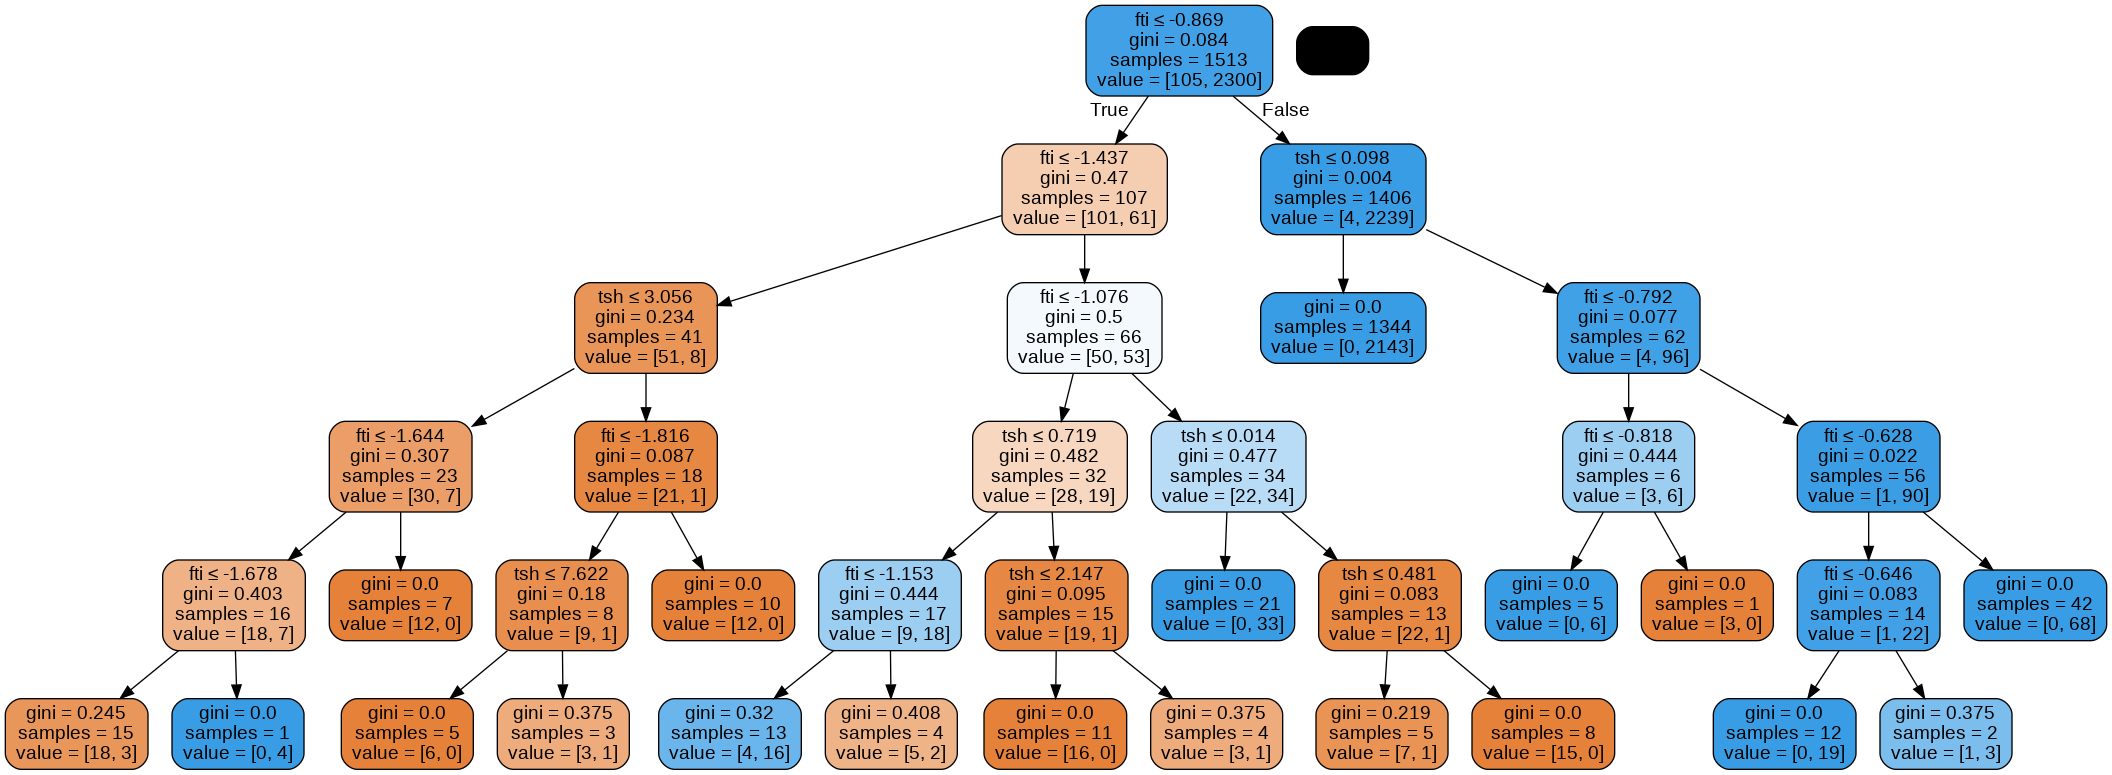

In [53]:
# Visualization
f = X1.columns.tolist()
Visualize_Class(X1_train, X1_test, y1_train, y1_test, f, 'Thyroidism', depth = 5,
                split = 2, n = 100)

All selected columns have been used in the classification process, therefore, it seems that the model is not overfitting on one or a few features.

**Hyperparameter Tuning**

In [48]:
# Random forest regressor without LDA
def RSearch(X, y, params, folds):

  # Scaling
  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  # Classifier
  model = RandomForestClassifier()
  rs_model = RandomizedSearchCV(estimator = model,
                            param_distributions= params,
                            n_iter=100,
                            scoring = 'f1',
                            cv= folds,
                            verbose= 1)
  # Model training
  rs_model.fit(X, y)
  # Best parameters
  print(f'Best parameters: {rs_model.best_params_}')
  # Best scores
  print(f'Best scores: {rs_model.best_score_}')

In [49]:
# Hyperparameter tuning using Randomized Search
# Hyperparameters to be tested
rf_params = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

In [154]:
# Hyperparameter Tuning
RSearch(X1, y, rf_params, 10)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


KeyboardInterrupt: ignored

In [51]:
# Implementing selected hyperparameters
estimators = 10
split = 2
leaf = 4
maxf = 'sqrt'
depth = 5
RF_Classifier(X1_train, X1_test, y1_train, y1_test, leaf, maxf, estimators,
                  depth, split)

Classification Report
----------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       552
           1       1.00      0.02      0.04        50

    accuracy                           0.92       602
   macro avg       0.96      0.51      0.50       602
weighted avg       0.93      0.92      0.88       602


Predictions
----------------------------------------------------------------------

   Actual  Predicted
0       0          0
1       0          0
2       0          0
3       0          0
4       0          0 



#### b) Gradient Boosting

**Functions Definition**

In [155]:
# GradientBoostingClassifier
# n =300
# lrate = 0.1
def GradientBClass(X_train, X_test, y_train, y_test, n, lrate, depth = None, split = 2):
  # Scaling
  X_train, X_test = Standardization(X_train, X_test)

  # Gradient Boosting
  gb = GradientBoostingClassifier(n_estimators= n, learning_rate= lrate, max_depth= depth)

  # Prediction
  gb= gb.fit(X_train, y_train)
  y_pred_gb = gb.predict(X_test)

  # Classification Report
  report = classification_report(y_test, y_pred_gb)
  print('Classification Report')
  print(f'{"-"*70}\n')
  print(report)

In [156]:
# Feature importances
def Importances_Class(X_train, X_test, y_train, y_test, f, n, lrate = 0.1,  depth= None, split = 2):
  # Scaling
  X_train, X_test = Standardization(X_train, X_test)

  # Gradient Boost
  gb = GradientBoostingClassifier(n_estimators= n, learning_rate= lrate, max_depth= depth)

  # Prediction
  gb= gb.fit(X_train, y_train)
  y_pred_gb = gb.predict(X_test)  

  # Importances
  importances = list(gb.feature_importances_)

  # Features
  feat = []
  imp = []

  # Dataframe
  df = pd.DataFrame()
  for feature, importance in zip(f, importances):
    feat.append(feature)
    imp.append(importance)
  df['features'] = feat
  df['importance'] = imp
  df.sort_values('importance', ascending = False, inplace = True)

  # Bar chart
  values = list(range(len(imp)))
  fig, ax = plt.subplots(figsize = (15, 5))
  plt.bar(feat, imp, orientation = 'vertical')
  # Tick labels for x axis
  plt.xticks(values, f, rotation='vertical')
  # Axis labels and title
  plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [158]:
# Gradient Bregressor without LDA
def RSearcH_GB(X, y, params, folds):
  # Scaling
  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  # Classifier
  model = GradientBoostingClassifier()
  rs_model = RandomizedSearchCV(estimator = model,
                            param_distributions= params,
                            n_iter=100,
                            scoring = 'f1',
                            cv= folds,
                            verbose= 1)
  # Model training
  rs_model.fit(X, y)
  # Best parameters
  print(f'Best parameters: {rs_model.best_params_}')
  # Best scores
  print(f'Best scores: {rs_model.best_score_}')

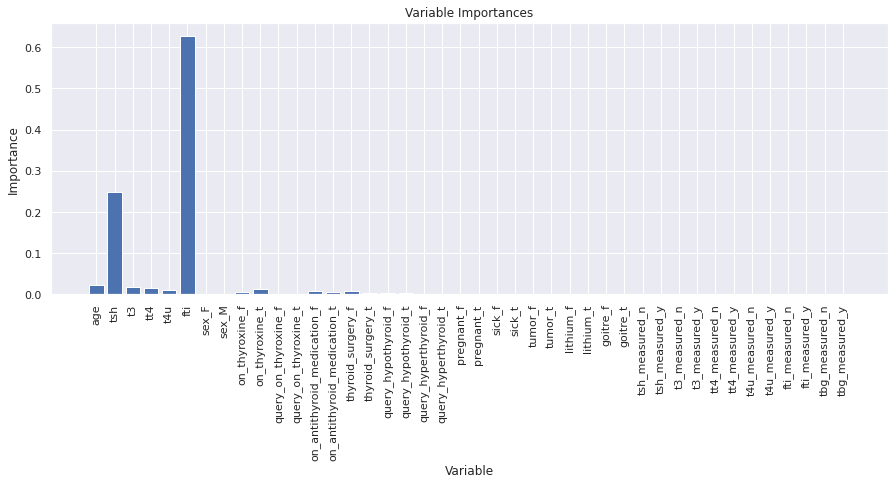

In [159]:
# Gradient Bppsting Feature Importance
n = 300
lrate = 0.1
depth = 5
split = 2
f = X.columns.tolist()
Importances_Class(X_train, X_test, y_train, y_test, f, n, lrate,  depth, split)

* The tsh and fti columns have the highest importance. Furthermore, they are similar to that of RandomForestClassifier. 
* Therefore, these features will form the training set.

**Model Fitting and Predictions**

In [162]:
# Gradient Boosting Classifier
estimators =300
lrate = 0.1
depth = 5
split = 2
GradientBClass(X1_train, X1_test, y1_train, y1_test, estimators, lrate, depth, split)

Classification Report
----------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.85      0.88      0.86        25
           1       0.99      0.99      0.99       577

    accuracy                           0.99       602
   macro avg       0.92      0.94      0.93       602
weighted avg       0.99      0.99      0.99       602



**Visualization**

**Hyperparameter Tuning**

In [ ]:
# Hyperparameter tuning using Randomized Search
# Hyperparameters to be tested
gb_params = {'n_estimators' : [10, 100, 200, 500, 1000, 1200],
             'learning_rate' : list(np.arange(0.1, 1.1, 0.1)),
             'max_depth': [None, 5, 10, 20, 30],
             'max_features': ['auto', 'sqrt', 'log2'],
             'min_samples_split': [2, 4, 6],
             'min_samples_leaf': list(np.arange(2, 33, 2))}

In [ ]:
# Randomized search
RSearcH_GB(X, y, gb_params, 10)

### Part 2. SVM

In [54]:
# Plot that displays the distribution of categories
def DesiredFeaturesPlot(x, y, data, hue, palette):
  sns.lmplot(x, y, data = data, hue = hue, palette = palette, fit_reg = False, scatter_kws = {'s': 70})
  plt.title('Category Distribution', y = 1.05);

In [55]:
# Mesh grid function
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# Hyperplane creation function
def plot_contours(ax, model, xx, yy, **params):
    pred = model.predict(np.c_[xx.ravel(), yy.ravel()])
    pred = pred.reshape(xx.shape)
    out = ax.contourf(xx, yy, pred, **params)
    return out


def Hyperplanes_Plot(X, y, kernel):
  model = SVC(kernel = kernel)
  model = model.fit(X, y)
  fig, ax = plt.subplots()
  # Plotting grid
  X0, X1 = X[:, 0], X[:, 1]
  xx, yy = make_meshgrid(X0, X1)
  # Scatter plot
  plot_contours(ax, model, xx, yy, cmap=plt.cm.viridis, alpha=0.8)
  ax.scatter(X0, X1, c=y, cmap=plt.cm.viridis, s=20, edgecolors='k')
  ax.set_xticks(())
  ax.set_yticks(())
  ax.set_title('Hypothyroid Classification')
  plt.show()

In [56]:
from sklearn.metrics import classification_report
def SVM_Class_Linear_(X_train, X_test, y_train, y_test, kernel, c = 1.0, g = 'scale', d = 3):
  # SVM model
  model = SVC(kernel = kernel, C = c, gamma = g, degree = d)
  # Model training
  model.fit(X_train, y_train)
  # Prediction
  y_pred = model.predict(X_test)
  predictions = pd.DataFrame({'Actaul Class': y_test.flatten(), 'Predicted Class': y_pred.flatten()})
  print(f'Predictions\n')
  print(predictions.head())
  # Accuracy
  print('Classification Report\n')
  report = classification_report(y_test, y_pred)
  print(report)


In [57]:
# Ranadom Search
def RSearcH_GB(X, y, params, folds):
  # Scaling
  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  # Classifier
  model = SVC()
  rs_model = RandomizedSearchCV(estimator = model,
                            param_distributions= params,
                            n_iter=100,
                            scoring = 'f1',
                            cv= folds,
                            verbose= 1)
  # Model training
  rs_model.fit(X, y)
  # Best parameters
  print(f'Best parameters: {rs_model.best_params_}')
  # Best scores
  print(f'Best scores: {rs_model.best_score_}')

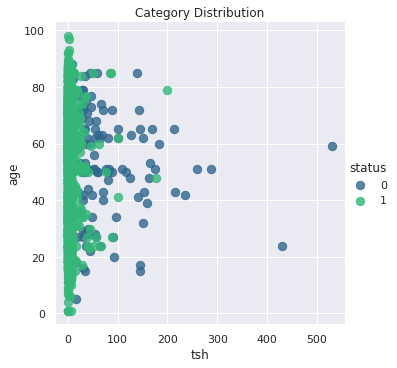

In [58]:
# Distribution of categories
DesiredFeaturesPlot('tsh','age', thyroid, 'status', 'viridis')

The values are overlapping, therefore, there is no clear linear distiction between the hypothyroid status of the patient.

In [59]:
# Features and label
X = thyroid[['age', 'tsh']].values
y = thyroid.status.values

In [ ]:
# Hyperplane plot
kernel = 'linear'
Hyperplanes_Plot(X, y, kernel)

In [ ]:
# Hyperplane plot
kernel = 'poly'
Hyperplanes_Plot(X, y, kernel)

In [ ]:
# Hyperplane plot
kernel = 'rbf'
Hyperplanes_Plot(X, y, kernel)

In [ ]:
# Hyperplane plot
kernel = 'sigmoid'
Hyperplanes_Plot(X, y, kernel)

In [ ]:
# Hyperparameters to be used during tuning .
svc_params = {'C' : [2**(-5), 2**(-4), 2**(-3), 2**(-2), 2**(-1), 1, 2, 4, 8, 16, 35],
              'gamma': ['scale', 'auto'],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'degree': [2, 3, 4, 5]}

## 7. Implementing the Solution

## 8. Challenging the Solution

## 9. Conclusion

## 10. Follow Up Questions

### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?